# Machine Learning & Statistics - Project



Name: Martin Cusack  

Student I.D: G00239124

***

**How to use this repository**

1. Install the latest version of Anaconda.
2. Install the latest version of Visual Studio Code.
3. Clone the repository at https://github.com/martincusack979/machine_learning_statistics
4. Open the repository in Visual Studio Code.
5. Use the Python interpreter 3.9.18.

***

 ## Introduction
 
 In this notebook, I will use a variety of machine learning algorithms to make classifications and predictions based on the widely-studied Fisher's Iris flower data set.  This data set first appeared in biologist Ronald Fisher's 1936 paper "The Use of Multiple Measurements in Taxonomic Problems".  Fisher's work has been highly influential in the fields of data science and machine learning over the decades since its publication and has been referenced on innumerable occasions by teachers and academics.

 Fisher's data set comprises a study of three different species of the Iris flower (Iris setosa, Iris virginica and Iris versicolor) and
 contains six columns: ID, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm and Species. I will fit and train a number of machine learning algorithms on this data in order to assess their relative accuracy in determining the class of each sample.


 ### Supervised learning

 There are currently two main approaches to machine learning: supervised learning and unsupervised learning.  Supervised learning is an approach generally used when dealing with labeled datasets, and uses the available data to train algorithms to accurately classify data and make predictions. By using inputs and outputs, the training model can learn from the data and as a result produce accurate outcomes.  
 
 By contrast, unsupervised learning is an approach generally used with unlabeled datasets. They do not require human intervention, hence are "unsupervised".  Unsupervised techniques are often used in the preprocessing stage of machine learning in order to reduce the dimensionality of a given data set. [1]
 

 ### Classification algorithms

 Classification algorithms are used in the machine learning process in order to make predictions and categorise data (an example being an email spam detector).  Examples of commonly-used classifiers include K Nearest Neighbors, Support Vector Machines (SVM), Naive Bayes and Random Forest.
 

 [1] *Supervised vs. Unsupervised Learning*, Julianna Delua. https://www.ibm.com/blog/supervised-vs-unsupervised-learning/

 ***

## Importing packages

In [1]:
# Data frames.
import pandas as pd

# numpy
import numpy as np

# Machine Learning.
import sklearn as sk

# Nearest neighbors.
import sklearn.neighbors as ne

# Preprocessing.
import sklearn.preprocessing as pre

# Decomposition.
import sklearn.decomposition as dec

# Statistical test.
import scipy.stats as ss

# Plots.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

After importing the required packages above, my first step in this project will be to import the Iris data set as a .csv file. I sourced the .csv file from __[Kaggle](https://www.kaggle.com/datasets/saurabh00007/iriscsv?resource=download)__. [2]

[2] *Iris.csv*, Saurabh Singh. https://www.kaggle.com/datasets/saurabh00007/iriscsv


In [2]:
# import iris data set using Pandas
df = pd.read_csv("Data\iris.csv")

## Summary statistics

In the following cells, I will summarise the data set using some basic Pandas functions to gain a better understanding of the dimensions of the data. It will also be useful to remove any anomalous features in the data, such as null values, which may affect any calculations later in the project.

In [3]:
# summary statistics - display number of rows and columns
df.shape

(150, 5)

In [4]:
# summary statistics - show first 10 rows
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
# Drop all rows with null values from data set
df_nona = df.dropna()

# show
df_nona

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


***

## Visualising the data

We can use one of seaborn's plotting functions to gain a better visual understanding of the data. Below, I use the pairplot function across the four variables of sepal and petal measurements, differentiated by class

c:\Users\cusac\anaconda33\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


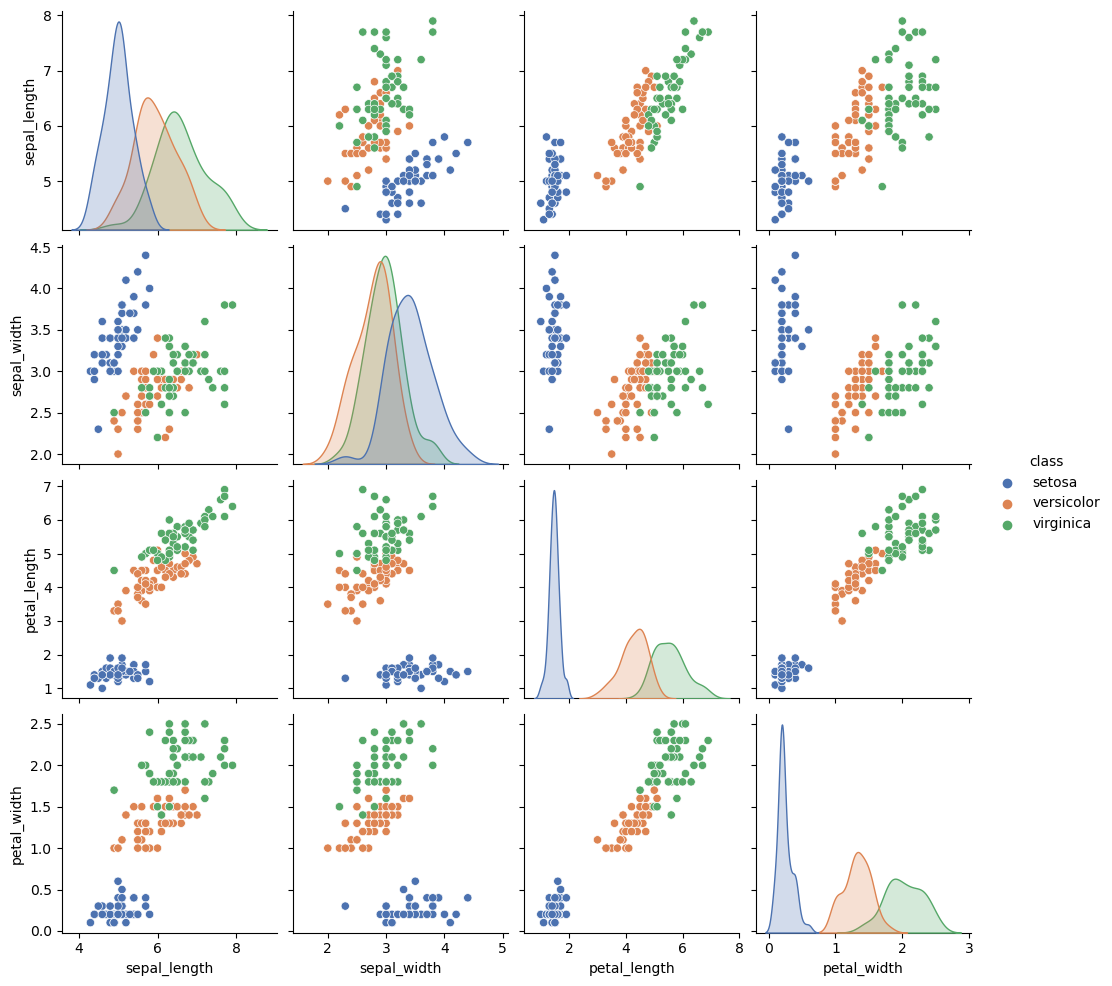

In [6]:
sns.pairplot(df_nona, hue = 'class', palette= "deep")

As we can see from the above visualisation, there is a degree of separability between the three different classes (Setosa, Versicolor and Virginica).  The Setosa class in particular appears to be linearly separable from the other two classes in almost every instance.  This clear separability indicates that a machine learning alogorithm, such as K Nearest Neighbours, should work very effectively with this data set.

## Machine Learning Algorithms - K Nearest Neighbors

K Nearest Neighbors (KNN) is one of the most widely-used machine learning algorithms, in part due to its simplicity. KNN is a supervised learning model which works by identifying a specified number of proximate data points, so that "classification is computed from a simple majority vote of the nearest neighbors of each point".[3]

In the below cells, I set up and train an instance of KNN to make predictions based on the Iris Data Set. This will be an example of binary classification, where "Class" is the target variable.

[3] *Nearest Neighbors*, scikit-learn developers. https://scikit-learn.org/stable/modules/neighbors.html
***

To run KNN on the Iris data set, we must fit the data to a new instance of the classifier. To do this, we firstly define the X values(the four variables: sepal length, sepal width, petal length and petal width of each sample) and the y value (the class of each sample).

In [7]:
# define the X values
X = df_nona[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
# define y value
y = df_nona['class']

y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [9]:
# Create new instance of K Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
clf = sk.neighbors.KNeighborsClassifier()


# Fit the data.
clf.fit(X, y)

KNeighborsClassifier()

In [10]:
# check that classifier correctly predicts class of first X sample ('setosa')
clf.predict(X.iloc[:1])

array(['setosa'], dtype=object)

**Train test split**

By importing and using the train_test_split function from scikit-learn, we can split up the data into train and test subsets. In the below cell, I hold back a portion of the data for testing, while training on teh others. This process also helps to "minimize the potential for bias in your evaluation and validation process".[4]

[4] *Split your Dataset with train_test_split*, Mirko Stojiljković. https://realpython.com/train-test-split-python-data/ 

In [11]:
# import train_test_split function and split dataset into training set and test set
import sklearn.model_selection as mod
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.33)

In [12]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
99,5.7,2.8,4.1,1.3
42,4.4,3.2,1.3,0.2
53,5.5,2.3,4.0,1.3
31,5.4,3.4,1.5,0.4
...,...,...,...,...
48,5.3,3.7,1.5,0.2
117,7.7,3.8,6.7,2.2
84,5.4,3.0,4.5,1.5
23,5.1,3.3,1.7,0.5


In [13]:
y_train

118     virginica
99     versicolor
42         setosa
53     versicolor
31         setosa
          ...    
48         setosa
117     virginica
84     versicolor
23         setosa
54     versicolor
Name: class, Length: 100, dtype: object

In [14]:
# check if length of training set is one-third of data set rows(i.e 50) as specified above 
print(y_test.shape)

(50,)


In [15]:
# re-initialise classifier
clf = sk.neighbors.KNeighborsClassifier()

In [16]:
# re-train classifier using X_train and y_train
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
clf.predict(X_test)

array(['virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor'], dtype=object)

In [18]:
# Proportion of correct classifications
(clf.predict(X_test) == y_test).sum() / X_test.shape[0]

1.0

As we can see from the above result, K Nearest Neighbours is highly effective in classifying the data in this particular dataset, scoring a success rate of 96%.

### Cross Validation

Evaluation using cross vaildation allows us to gain a good overall sense of the accuracy of a given algorithm. Cross validation works by dividing the data up into subsets or "folds" and using each of these folds as a validation set.  The average of each result is then calculated to give a final score. Using cross validation can help "to ensure that the model selected for deployment is robust and generalizes well to new data".[5]  In the below cell, I will run cross-validation with five folds (the default amount of folds) to determine the accuracy of the K Nearest Neighbours algorithm.

[5] *Cross Validation in Machine Learning*. https://www.geeksforgeeks.org/cross-validation-machine-learning/

In [19]:
from sklearn.model_selection import cross_val_score, KFold

In [20]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Run cross-validation with five folds by calling cross_val_score function (default folds = 5)
cv_result = sk.model_selection.cross_val_score(clf, X, y)
print(cv_result)
print(f'Mean Accuracy: {cv_result.mean()}')

[0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Accuracy: 0.9733333333333334


## Machine Learning Algorithms - Support Vector Machines (SVM)


Support vector machines (SVM) are a popular and effective set of machine learning algorithms, offering a high degree of accuracy and fast predictions. SVM is highly versatile and can be used "for classification, regression and outliers detection".[6] It's various applications include face detection, intrusion detection and classification of emails. The idea behind SVM is based on the concept of "decision planes", which define decision boundaries.

In the below cells, I set up and train an instance of SVM to make predictions based on the Iris Data Set. Again, this will be an example of binary classification where "Class" is the target variable.

[6] *Support Vector Machines* Scikit-learn developers https://scikit-learn.org/stable/modules/svm.html

In [21]:
from sklearn import svm

In [22]:
# insert inputs and outputs (X and y)
inputs = df_nona[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs = df_nona['class']

In [23]:
# create instance of SVM Classifier (clf = classifier)
clf = svm.SVC(kernel='linear')

In [24]:
# train the classifier using the training sets defined above
clf.fit(inputs, outputs)

SVC(kernel='linear')

In [25]:
# check accuracy
(clf.predict(inputs)==outputs).sum()

149

As we can see from the above, 149 out of 150 predictions (there are 150 rows in the dataset) were accurate, a success rate of 99%.

In the below cell, as with K Nearest Neighbors, I split the data once again into test and train subsets so that we can re-run the SVM algorithm.

In [26]:
# Split dataset into training set and test set, holding back 33% for testing
inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.33) 

In [27]:
# check if length of outputs_test is one-third of data set rows(i.e 50) as specified above 
print(outputs_test.shape)

(50,)


As stated on the scikit-learn site, "kernel functions can be specified for the decision function." Below I will create a new instance of the SVM classifier, setting the kernel function as "linear".

Reference: *Support Vector Machines*, Scikit-learn developers https://scikit-learn.org/stable/modules/svm.html

In [28]:
# re-initialise classifier
clf = svm.SVC(kernel='linear')

In [29]:
# retraining classifier, this time with inputs_train and outputs_train instead of full data set
clf.fit(inputs_train, outputs_train)

SVC(kernel='linear')

In [30]:
# execute predict
(clf.predict(inputs_test) == outputs_test).sum()

49

As we can see from the above, 149 out of 150 predictions (there are 150 rows in the dataset) were accurate, a success rate of 99%.

In the below cell, as with K Nearest Neighbors, I split the data once again into test and train subsets so that we can re-run the SVM algorithm.

In [31]:
# proportion of correct classifications
(clf.predict(inputs_test) == outputs_test).sum() / inputs_test.shape[0]

0.98

As shown above, the Support Vector Machines algorithm had a success rate of 98% when making predictions. This is a slightly higher rate of success than calculated by the Nearest Neighbours algorithm.
***

### Cross Validation

Below, I will assess the accuracy of the Support Vector Machines algorithm by again using cross validation.

In [32]:
# import SVC for cross validation
from sklearn.svm import SVC

In [33]:
svm_classifier = SVC(kernel='linear')

# define number of folds and shuffle data
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

In [34]:
# Run cross-validation with 5 folds
cross_val_results = cross_val_score(svm_classifier, inputs, outputs, cv=kf)

In [35]:
# print evaluation results
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [1.         0.96666667 1.         0.93333333 0.93333333]
Mean Accuracy: 0.9666666666666668


## Machine Learning Algorithms - Naive Bayes


Naive Bayes is a classification algorithm based on Bayes Theorem. It is one of the simplest supervised learning techniques, often used in spam filtering and text classification, and is notable for its speed and accuracy.

In the below cells, I set up and train an instance of Naive Bayes using the Gaussian algorithm to make predictions based on the Iris data set. Again, this will be an example of binary classification where "Class" is the target variable.

In [36]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [37]:
# inputs and outputs
inputs2 = df_nona[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
outputs2 = df_nona ['class']

In [38]:
# create new instance of Gaussian Classifier
nb = GaussianNB()

In [39]:
# Train the model using the training sets
nb.fit(inputs2, outputs2)

GaussianNB()

In [40]:
# check accuracy
(nb.predict(inputs2)==outputs2).sum()

144

As we can from the above test, 144 out of 150 predictions were accurate, a success rate of 96%.

In the below cell, I again split the data into test and train subsets so that we can re-run the Gaussian algorithm.

In [41]:
# import train_test_split function and split dataset into training set and test set
inputs2_train, inputs2_test, outputs2_train, outputs2_test = train_test_split(inputs2, outputs2, test_size=0.5, random_state=0)

In [42]:
# re-initialise Gaussian Classifier
nb = GaussianNB()

In [43]:
# retraining classifier
nb.fit(inputs2_train, outputs2_train)

GaussianNB()

In [44]:
# execute predict
(nb.predict(inputs2_test) == outputs2_test).sum() / inputs2_test.shape[0]



0.9466666666666667

As shown above, the Naive Bayes algorithm had a success rate of 94.6% when making predictions. This is a slightly lower rate of success than calculated by both the Nearest Neighbours and SVM algorithms.
***

### Cross Validation

In the below cell I will assess the accuracy of the Naive Bayes algorithm by using cross validation, this time using 10 folds.

In [45]:
# re-initialise Gaussian classifier

nb = GaussianNB()  

In [46]:
# run 10-fold cross validation
results = cross_val_score(nb, inputs2, outputs2, cv=10, scoring="accuracy")

In [47]:
# print evaluation results
print(f'Cross-Validation Results (Accuracy): {results}')
print(f'Mean Accuracy: {results.mean()}')

Cross-Validation Results (Accuracy): [0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
Mean Accuracy: 0.9533333333333334


***

### Visualising effectiveness of the classifiers
Now that I have found the mean accuracy of the algorithms which I have used on the Iris data set using cross validation, a bar chart can display the relative accuracy achieved by each (see below). As we can see, KNN Nearest Neighbours proved to be the most effective classifier in predicting the class of each sample.

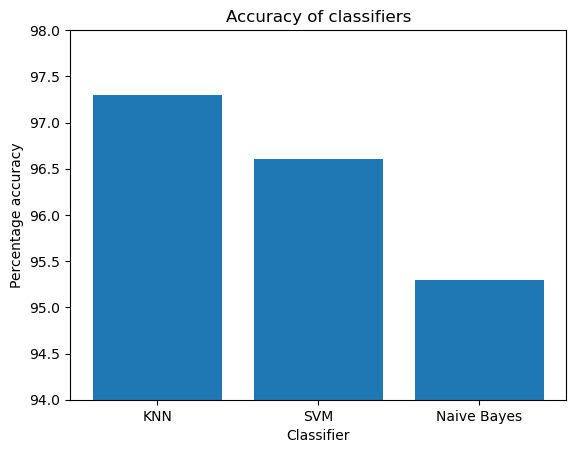

In [48]:
# Create bar chart comparing rate of accuracy of each of the algorithms: KNN, SVM and Naive Bayes.
algorithm = ['KNN', 'SVM', 'Naive Bayes']
accuracy = [97.3, 96.6, 95.3]
plt.bar(algorithm, accuracy)
plt.title('Accuracy of classifiers')
plt.xlabel('Classifier')
plt.ylabel('Percentage accuracy')
plt.ylim(94, 98) # define limits of y axis
plt.show()

### References

[1] *Supervised vs. Unsupervised Learning*, Julianna Delua. https://www.ibm.com/blog/supervised-vs-unsupervised-learning/

[2] *Iris.csv*, Saurabh Singh. https://www.kaggle.com/datasets/saurabh00007/iriscsv

[3] *Nearest Neighbors*, scikit-learn developers. https://scikit-learn.org/stable/modules/neighbors.html

[4] *Split your Dataset with train_test_split*, Mirko Stojiljković. https://realpython.com/train-test-split-python-data/ 

[5] *Cross Validation in Machine Learning*. https://www.geeksforgeeks.org/cross-validation-machine-learning/

[6] *Support Vector Machines*, Scikit-learn developers https://scikit-learn.org/stable/modules/svm.html

[7] *Support Vector Machines with Scikit-learn Tutorial*, Avinash Naviani.(2019) https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python      

[8] *Naive Bayes*, Scikit-learn developers.  https://scikit-learn.org/stable/modules/naive_bayes.html

[9] *Naive Bayes Classification Tutorial using Scikit-learn*, Abid Ali Awan.(2018) https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

[10] *Machine Learning*. https://www.w3schools.com/python/python_ml_getting_started.asp
***

## End
***